In [1]:
import pandas as pd
df = pd.read_csv("/content/bank .csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
print("DataFrame info:")
print(df.info)

DataFrame info:
<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

   

(a) columns with dtypes=object

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print(f"Columns with dtype 'object': {object_columns}")

Columns with dtype 'object': Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


b) Unique values of those columns

In [ ]:
for col in object_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in default: ['no' 'yes']
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['unknown' 'cellular' 'telephone']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome: ['unknown' 'failure' 'other' 'success']
Unique values in y: ['no' 'yes']


(c) check for the total number of null values in each column.

In [ ]:
null_counts = df.isnull().sum()
print(f"Total number of null values in each column:\n{null_counts}")

Total number of null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [ ]:
df_numeric = df.drop(columns=object_columns)

In [ ]:
# Save this DataFrame to a new CSV file
df_numeric.to_csv('banknumericdata.csv', index=False)

In [ ]:
# 4. Read 'banknumericdata.csv' and find the summary statistics
df_numeric_read = pd.read_csv('banknumericdata.csv')

In [ ]:
# Summary statistics for numeric data
summary_stats = df_numeric_read.describe()
print(f"Summary statistics of the numeric data:\n{summary_stats}")

Summary statistics of the numeric data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000    

Problem 2 - Data Imputations:

1. Load the provided dataset and import in pandas DataFrame.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSV/medical_students_dataset.csv")

2. Check info of the DataFrame and identify column with missing (null) values.

In [ ]:
print("Initial DataFrame Info:")
df_info = df.info()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [ ]:
# Step 3: Handle missing data (Imputation)
def impute_missing_data(df):
    # For numerical columns, we fill missing values with the median (for robustness to outliers)
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Imputed missing values in numerical column '{col}' with median: {median_value}")

    # For categorical columns, we fill missing values with the mode (most frequent value)
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in categorical column '{col}' with mode: {mode_value}")

    return df

# Perform imputation
df_imputed = impute_missing_data(df)

# Display updated info to verify imputations
print("\nAfter imputation:")
df_imputed.info()

Imputed missing values in numerical column 'age' with median: 39.0
Imputed missing values in numerical column 'balance' with median: 448.0
Imputed missing values in numerical column 'day' with median: 16.0
Imputed missing values in numerical column 'duration' with median: 180.0
Imputed missing values in numerical column 'campaign' with median: 2.0
Imputed missing values in numerical column 'pdays' with median: -1.0
Imputed missing values in numerical column 'previous' with median: 0.0
Imputed missing values in categorical column 'job' with mode: blue-collar
Imputed missing values in categorical column 'marital' with mode: married
Imputed missing values in categorical column 'education' with mode: secondary
Imputed missing values in categorical column 'default' with mode: no
Imputed missing values in categorical column 'housing' with mode: yes
Imputed missing values in categorical column 'loan' with mode: no
Imputed missing values in categorical column 'contact' with mode: cellular
Impu

<ipython-input-18-97aff9f7fb94>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
<ipython-input-18-97aff9f7fb94>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
# Step 4: Check for duplicate values and manage them
duplicates = df_imputed.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If duplicates are found, drop them
if duplicates > 0:
    df_imputed = df_imputed.drop_duplicates()
    print(f"Duplicate rows removed. New dataset shape: {df_imputed.shape}")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/CSV/Titanic-Dataset.csv')


In [ ]:
# Step 2: Subset the DataFrame to retain specific columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

In [ ]:
# Step 3: Filter the rows where 'Pclass' == 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

In [ ]:
# Step 4: Calculate the mean, median, maximum, and minimum values of the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Print the results
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
# Step 4: Check for null values in the 'Age' column
null_values_in_age = first_class_df['Age'].isnull().sum()

# Print the number of null values in 'Age'
print(f"Number of null values in 'Age' column: {null_values_in_age}")


Number of null values in 'Age' column: 30


In [ ]:
# Step 5: Drop rows with null values in the 'Age' column
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

# Step 6: Confirm the change by checking the number of null values again
null_values_after_dropping = first_class_df_cleaned['Age'].isnull().sum()
print(f"Number of null values in 'Age' column after dropping: {null_values_after_dropping}")

# Optionally, display the cleaned DataFrame
# print(first_class_df_cleaned)

Number of null values in 'Age' column after dropping: 0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
# Step 2: One-hot encoding of the 'Embarked' column
# Use pd.get_dummies() to create binary columns for each category (C, Q, S)
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Step 3: Add the new columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Step 4: Drop the original 'Embarked' column
df = df.drop('Embarked', axis=1)

# Step 5: Print the first few rows of the modified DataFrame to verify changes
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-28-9ec39e695f6a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Survived', data=df, palette='Set2')


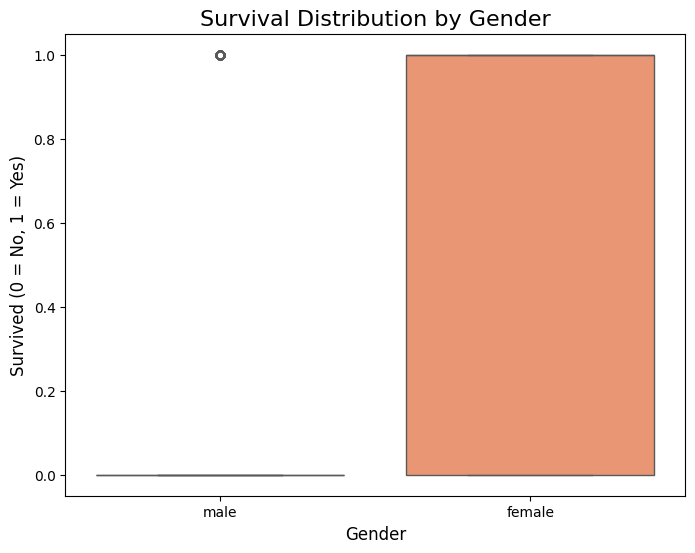

In [ ]:
# Step 2: Calculate the mean survival rates by gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_gender)

# Step 3: Visualization of survival distribution by gender
# Let's use a seaborn boxplot to show the survival distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Survived', data=df, palette='Set2')

# Add title and labels
plt.title('Survival Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survived (0 = No, 1 = Yes)', fontsize=12)

# Show the plot
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<ipython-input-30-1b73805686ad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Embarked', y='Survived', data=df, palette='Set2')


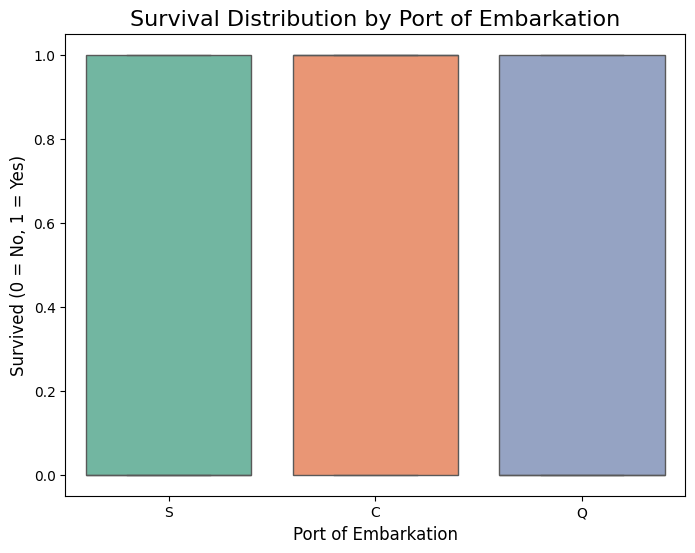

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/CSV/Titanic-Dataset.csv')

# Step 2: Create a visualization to compare survival distribution by port of embarkation
# We will use the 'Embarked' column, which contains categorical data (C, Q, S)

# Box plot showing survival distribution by Embarked (port of embarkation)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Survived', data=df, palette='Set2')

# Add title and labels
plt.title('Survival Distribution by Port of Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Survived (0 = No, 1 = Yes)', fontsize=12)

# Show the plot
plt.show()


<ipython-input-31-857a21695416>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_by_embarked.index, y=mean_survival_by_embarked.values, palette='Set2')


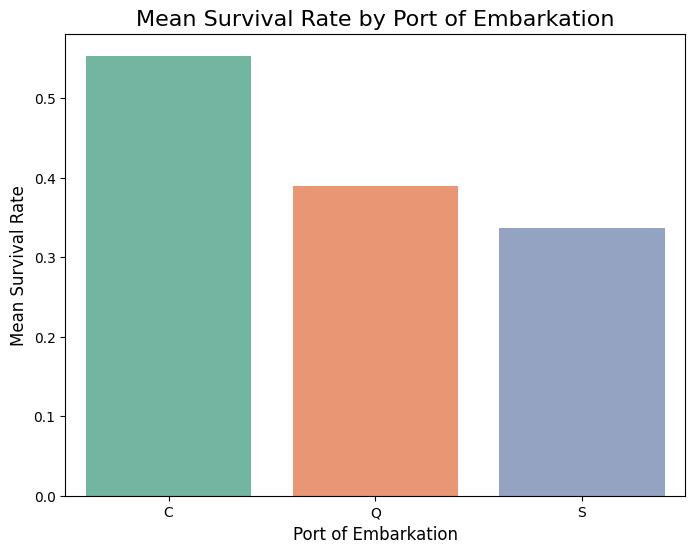

In [ ]:
# Calculate the mean survival rate for each port of embarkation
mean_survival_by_embarked = df.groupby('Embarked')['Survived'].mean()

# Bar plot for mean survival by port of embarkation
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_survival_by_embarked.index, y=mean_survival_by_embarked.values, palette='Set2')

# Add title and labels
plt.title('Mean Survival Rate by Port of Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Mean Survival Rate', fontsize=12)

# Show the plot
plt.show()
